# **Introduction**

This notebook included statistical fun facts that were left out from previous analysis. We put them together here for write-up. Will periodically update whenever we need extra information. We will try to add back these tiny fun facts to the original analysis for better flow, but if they stand alone fine, we will keep add them to this file.

In [2]:
# !pip install geopandas folium matplotlib seaborn scipy
# !pip install esda
# !pip install splot
# # for google colab, had to reinstall some pacakges.

In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime as dt
import scipy

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# visualization
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium import Marker
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.io as pio
from scipy.stats import percentileofscore

# system and utility
import warnings
import os
import io
from IPython.display import IFrame
from google.colab import files

import matplotlib.pyplot as plt

# suppress warnings
warnings.filterwarnings('ignore')

# inline
%matplotlib inline

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', 1000)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# save cleaned evictions data to my drive
link1 = '/content/drive/My Drive/X999/evictions_pre_post_covid.csv'
link2 = '/content/drive/My Drive/X999/evictions_covid.csv'

In [29]:
# data source:
link3 = '/content/drive/My Drive/X999/bbl_evictions_311_svi_normal_times.csv'
link4= '/content/drive/My Drive/X999/bbl_evictions_311_svi_covid.csv'

In [8]:
normal_df = pd.read_csv(link1)
covid_df = pd.read_csv(link2)

In [9]:
brooklyn = normal_df[normal_df['borough'] == 'BROOKLYN']
manhattan = normal_df[normal_df['borough'] == 'MANHATTAN']
queens = normal_df[normal_df['borough'] == 'QUEENS']
bronx = normal_df[normal_df['borough'] == 'BRONX']
staten_island = normal_df[normal_df['borough'] == 'STATEN ISLAND']

In [10]:
brooklyn.shape, manhattan.shape, queens.shape, bronx.shape, staten_island.shape

((21713, 22), (12060, 22), (13725, 22), (26701, 22), (2519, 22))

## **What are the average eviction counts per building per year in different boroughs**

In [11]:
brooklyn.average_year_eviction_count.describe()

,average_year_eviction_count
count,21713.000000
mean,1.087118
std,3.356285
min,0.200000
25%,0.200000
50%,0.400000
75%,0.800000
max,35.600000


In [12]:
manhattan.average_year_eviction_count.describe()

,average_year_eviction_count
count,12060.000000
mean,0.974411
std,1.517442
min,0.200000
25%,0.200000
50%,0.600000
75%,1.000000
max,13.800000


In [13]:
staten_island.average_year_eviction_count.describe()

,average_year_eviction_count
count,2519.000000
mean,0.836284
std,1.197151
min,0.200000
25%,0.200000
50%,0.400000
75%,0.600000
max,5.600000


In [14]:
queens.average_year_eviction_count.describe()

,average_year_eviction_count
count,13725.000000
mean,1.137647
std,2.522823
min,0.200000
25%,0.200000
50%,0.400000
75%,0.800000
max,20.600000


In [15]:
bronx.average_year_eviction_count.describe()

,average_year_eviction_count
count,26701.000000
mean,1.576795
std,2.553449
min,0.200000
25%,0.400000
50%,1.000000
75%,1.800000
max,27.800000


In [16]:
manhattan.average_year_eviction_count.describe()

,average_year_eviction_count
count,12060.000000
mean,0.974411
std,1.517442
min,0.200000
25%,0.200000
50%,0.600000
75%,1.000000
max,13.800000


In [17]:
borough_dict = {'Brooklyn': brooklyn.average_year_eviction_count.mean(), 'Manhattan': manhattan.average_year_eviction_count.mean(),
                'Queens': queens.average_year_eviction_count.mean(), 'Bronx': bronx.average_year_eviction_count.mean(),
                'Staten Island': staten_island.average_year_eviction_count.mean()}

In [18]:
sorted_list = sorted(borough_dict)

In [19]:
sorted_list

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

### **In short, Bronx has the most average eviction counts, followed by brooklyn, manhattan, queens, and the Staten island.**

## **Check out the exact total records before 2025**

In [20]:
link3 = '/content/drive/My Drive/X999/Evictions.csv'
raw_evictions = pd.read_csv(link3)

In [21]:
raw_evictions.shape

(104457, 20)

In [22]:
raw_evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [23]:
raw_evictions['Executed Date'] = pd.to_datetime(raw_evictions['Executed Date'], errors='coerce')

In [24]:
raw_evictions['year'] = raw_evictions['Executed Date'].dt.year
# need to explicitly declaire year

In [25]:
raw_evictions.year.value_counts()

,count
year,
2017,22522
2018,21830
2019,18715
2024,16755
2023,13447
2022,5067
2020,3422
2025,2431
2021,268


In [26]:
raw_evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'year'],
      dtype='object')

In [27]:
raw_evictions = raw_evictions[raw_evictions['year'] != 2025]

In [28]:
raw_evictions.shape
# used in write up

(102026, 21)

# **Clustering Patterns**

## **SVI Stuff**

In [261]:
evictions_pre_post = pd.read_csv(link3)

In [262]:
nta_borough = evictions_pre_post.groupby('nta')['borough'].first()

In [263]:
evi_svi_df = evictions_pre_post.groupby('nta')[['average_year_eviction_count','rpl_themes']].mean()
evi_svi_df.sort_values('average_year_eviction_count', ascending=False, inplace=True)
evi_svi_df.head(20)

,average_year_eviction_count,rpl_themes
nta,,
park-cemetery-etc-Bronx,6.466667,0.992500
Seagate-Coney Island,4.390428,0.991117
Corona,4.259729,0.963186
University Heights-Morris Heights,3.505120,0.997861
Park Slope-Gowanus,2.372549,0.632673
Grymes Hill-Clifton-Fox Hills,2.335974,0.944431
Morrisania-Melrose,2.255050,0.996456
Bronxdale,2.239594,0.990913
Brownsville,2.090909,0.993279


In [264]:
evi_svi_df = evi_svi_df.merge(nta_borough.reset_index(), on='nta', how='left')
evi_svi_df

,nta,average_year_eviction_count,rpl_themes,borough
0,park-cemetery-etc-Bronx,6.466667,0.992500,BRONX
1,Seagate-Coney Island,4.390428,0.991117,BROOKLYN
2,Corona,4.259729,0.963186,QUEENS
3,University Heights-Morris Heights,3.505120,0.997861,BRONX
4,Park Slope-Gowanus,2.372549,0.632673,BROOKLYN
5,Grymes Hill-Clifton-Fox Hills,2.335974,0.944431,STATEN ISLAND
6,Morrisania-Melrose,2.255050,0.996456,BRONX
7,Bronxdale,2.239594,0.990913,BRONX
8,Brownsville,2.090909,0.993279,BROOKLYN
9,Claremont-Bathgate,1.978344,0.997077,BRONX


In [265]:
top_20 = evi_svi_df.head(20)

In [266]:
avergae_svi_top_20_nta = top_20.rpl_themes.sum()/20
avergae_svi_top_20_nta
# important

np.float64(0.9000271233807637)

In [267]:
(avergae_svi_top_20_nta - 0.5)/0.5
# 80% higher than the national average
# https://pmc.ncbi.nlm.nih.gov/articles/PMC9764237/
# important

np.float64(0.8000542467615275)

In [268]:
all_svi_values = evi_svi_df.rpl_themes.values

In [269]:
percentile = percentileofscore(all_svi_values, avergae_svi_top_20_nta, kind='weak')
percentile
# important

np.float64(40.64171122994652)

In [270]:
avergae_evi_top_20_nta = top_20.average_year_eviction_count.sum()/20
avergae_evi_top_20_nta
# important

np.float64(2.432331759872709)

In [271]:
# average_evi = evi_svi_df.average_year_eviction_count.mean()
# average_evi
# # important

In [272]:
# higher_evi_pct = (avergae_evi_top_20_nta - average_evi)/average_evi * 100
# higher_evi_pct
# 168% times
# # important

In [273]:
avergae_svi = evi_svi_df.rpl_themes.mean()
avergae_svi
# important

np.float64(0.7930658135049042)

In [274]:
higher_pct = (avergae_svi_top_20_nta - avergae_svi)/avergae_svi * 100
higher_pct
# important

np.float64(13.48706602332923)

In [337]:
(avergae_svi - 0.5)/0.5
# nyc is 58.61% higher than national average in terms of svi

np.float64(0.5861316270098085)

In [344]:
(avergae_evi_top_20_nta - 0.5)/0.5

np.float64(3.8646635197454184)

In [275]:
out_of_range_ntas = evi_svi_df[(evi_svi_df['rpl_themes'] < 0) | (evi_svi_df['rpl_themes'] > 1)]
out_of_range_ntas

,nta,average_year_eviction_count,rpl_themes,borough
139,St. Albans,0.402649,-2.425199,QUEENS
151,East Elmhurst,0.362025,-11.697730,QUEENS


In [276]:
# evi_svi_df.describe()

In [277]:
evi_svi_df.shape

(187, 4)

In [278]:
evi_svi_df_cleaned = evi_svi_df[(evi_svi_df['rpl_themes'] >= 0) & (evi_svi_df['rpl_themes'] <= 1)]
evi_svi_df_cleaned.shape

(185, 4)

In [279]:
all_svi_values_cleaned = evi_svi_df_cleaned.rpl_themes.values

In [280]:
evi_svi_df_cleaned.describe()
# important

,average_year_eviction_count,rpl_themes
count,185.000000,185.000000
mean,0.910566,0.877980
std,0.761055,0.130411
min,0.200000,0.396096
25%,0.405063,0.847971
50%,0.731579,0.921319
75%,1.194595,0.963961
max,6.466667,0.998457


In [281]:
# evi_svi_df_cleaned = evi_svi_df_cleaned[evi_svi_df_cleaned['borough'] != 'STATEN ISLAND']
# evi_svi_df_cleaned.shape

In [310]:
all_svi_values_cleaned = evi_svi_df_cleaned.rpl_themes.values
all_svi_values_cleaned.mean()
# important

np.float64(0.8779796568204673)

In [283]:
percentile = percentileofscore(all_svi_values_cleaned, avergae_svi_top_20_nta, kind='weak')
percentile

np.float64(40.0)

In [296]:
avergae_svi_cleaned = evi_svi_df_cleaned.rpl_themes.mean()
avergae_svi_cleaned, avergae_svi_top_20_nta,

(np.float64(0.8779796568204673), np.float64(0.9000271233807637))

In [312]:
(avergae_svi_top_20_nta - avergae_svi_cleaned)/avergae_svi_cleaned
# important

np.float64(0.025111591583043692)

In [298]:
top_20

,nta,average_year_eviction_count,rpl_themes,borough
0,park-cemetery-etc-Bronx,6.466667,0.992500,BRONX
1,Seagate-Coney Island,4.390428,0.991117,BROOKLYN
2,Corona,4.259729,0.963186,QUEENS
3,University Heights-Morris Heights,3.505120,0.997861,BRONX
4,Park Slope-Gowanus,2.372549,0.632673,BROOKLYN
5,Grymes Hill-Clifton-Fox Hills,2.335974,0.944431,STATEN ISLAND
6,Morrisania-Melrose,2.255050,0.996456,BRONX
7,Bronxdale,2.239594,0.990913,BRONX
8,Brownsville,2.090909,0.993279,BROOKLYN
9,Claremont-Bathgate,1.978344,0.997077,BRONX


In [299]:
bk_count = top_20[top_20['borough'] == 'BROOKLYN'].shape[0]
br_count = top_20[top_20['borough'] == 'BRONX'].shape[0]
man_count = top_20[top_20['borough'] == 'MANHATTAN'].shape[0]
qn_count = top_20[top_20['borough'] == 'QUEENS'].shape[0]
si_count = top_20[top_20['borough'] == 'STATEN ISLAND'].shape[0]
bk_count, br_count, man_count, qn_count, si_count

(3, 11, 2, 2, 2)

In [288]:
race_columns = ['ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace']
racial_avg_all = evictions_pre_post.groupby('nta')[['average_year_eviction_count', 'ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace', 'rpl_themes']].mean()
racial_avg_all.sort_values('average_year_eviction_count', ascending=False, inplace=True)
racial_avg_all.reset_index(inplace=True)
racial_avg_all.head()

,nta,average_year_eviction_count,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes
0,park-cemetery-etc-Bronx,6.466667,28.600000,6.200000,52.900000,0.0,8.700000,2.300000,0.700000,0.992500
1,Seagate-Coney Island,4.390428,20.138539,9.826952,19.415869,0.0,47.392695,2.914358,0.015869,0.991117
2,Corona,4.259729,7.396833,11.304977,75.766817,0.0,4.427451,0.503922,0.499698,0.963186
3,University Heights-Morris Heights,3.505120,24.440663,1.607907,69.335316,0.0,2.054443,1.848870,0.704593,0.997861
4,Park Slope-Gowanus,2.372549,7.485294,9.500980,16.346078,0.0,60.637255,5.420588,0.576471,0.632673


In [289]:
top_20_race_evictions = racial_avg_all[racial_avg_all['nta'].isin(top_20.nta.values)]
# the only way to add a new column is to use 'xxx' dot does not work
top_20_race_evictions['bh_pct'] = top_20_race_evictions['ep_afam'] + top_20_race_evictions['ep_hisp']
top_20_race_evictions.head()

,nta,average_year_eviction_count,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,bh_pct
0,park-cemetery-etc-Bronx,6.466667,28.600000,6.200000,52.900000,0.0,8.700000,2.300000,0.700000,0.992500,81.500000
1,Seagate-Coney Island,4.390428,20.138539,9.826952,19.415869,0.0,47.392695,2.914358,0.015869,0.991117,39.554408
2,Corona,4.259729,7.396833,11.304977,75.766817,0.0,4.427451,0.503922,0.499698,0.963186,83.163650
3,University Heights-Morris Heights,3.505120,24.440663,1.607907,69.335316,0.0,2.054443,1.848870,0.704593,0.997861,93.775979
4,Park Slope-Gowanus,2.372549,7.485294,9.500980,16.346078,0.0,60.637255,5.420588,0.576471,0.632673,23.831373


In [313]:
avg_bh_pct_top_20 = top_20_race_evictions.bh_pct.mean()
avg_bh_pct_top_20
# important

np.float64(65.31164208037654)

In [291]:
racial_avg_all['bh_pct'] = racial_avg_all['ep_afam'] + racial_avg_all['ep_hisp']
racial_avg_all.head()

,nta,average_year_eviction_count,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,bh_pct
0,park-cemetery-etc-Bronx,6.466667,28.600000,6.200000,52.900000,0.0,8.700000,2.300000,0.700000,0.992500,81.500000
1,Seagate-Coney Island,4.390428,20.138539,9.826952,19.415869,0.0,47.392695,2.914358,0.015869,0.991117,39.554408
2,Corona,4.259729,7.396833,11.304977,75.766817,0.0,4.427451,0.503922,0.499698,0.963186,83.163650
3,University Heights-Morris Heights,3.505120,24.440663,1.607907,69.335316,0.0,2.054443,1.848870,0.704593,0.997861,93.775979
4,Park Slope-Gowanus,2.372549,7.485294,9.500980,16.346078,0.0,60.637255,5.420588,0.576471,0.632673,23.831373


In [314]:
racial_avg_all_bh_pct = racial_avg_all.bh_pct.mean()
racial_avg_all_bh_pct
# important

np.float64(49.541793265928135)

In [293]:
(avg_bh_pct_top_20 - racial_avg_all_bh_pct)/racial_avg_all_bh_pct
# 30% higher than the nyc bh average
# important

np.float64(0.31831404910596894)

In [343]:
(racial_avg_all_bh_pct - (12.4 + 18.7))/(12.4 + 18.7), avg_bh_pct_top_20, racial_avg_all_bh_pct
# nyc avergae is 59.30% higher than national average.

(np.float64(0.5929837062999399),
 np.float64(65.31164208037654),
 np.float64(49.541793265928135))

In [334]:
percentile_bh = percentileofscore(racial_avg_all.bh_pct.values, avg_bh_pct_top_20, kind='weak')
percentile_bh

np.float64(63.63636363636364)

In [315]:
(avg_bh_pct_top_20 - (12.4 + 18.7))/(12.4 + 18.7)
# is 110% times higher than the national bh average
# important

np.float64(1.1000528000121075)

## **Summaries**

The top 20 eviction-affected nta has an svi of 0.90, which is 80% higher than the national average 0.5. and 2.5% higher than the city-wide-average of 0.8789. These top 20 nta had an average of 2.43 evictions per building, per year, which is 168.80% times higher than the City-wide-average of 0.90. The top 20 neighborhoods had about 65% black and hispanic population percentage, which is 31.83% higher than the city-wide-average, 49.54%; it is also 110% times higher than the national average. Among the top 20 nta, bronx has 11, while bk has 3, and manhattan, queesn and si only has 2.

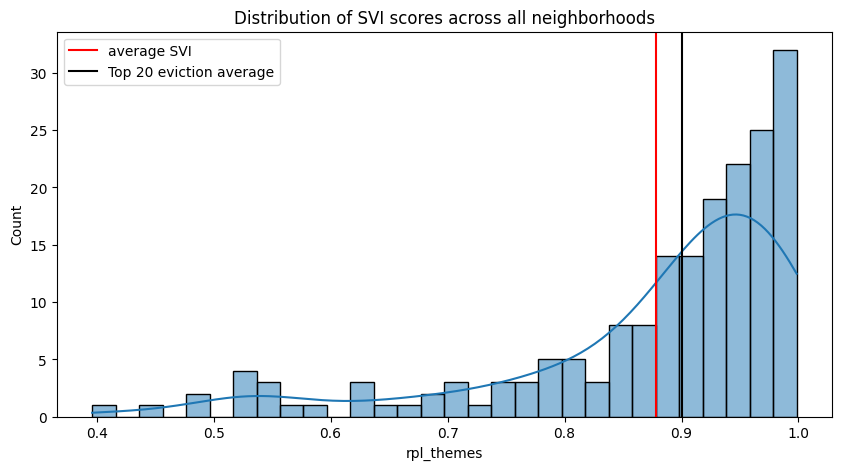

In [309]:
plt.figure(figsize=(10, 5))
sns.histplot(evi_svi_df_cleaned['rpl_themes'], kde=True, bins=30)
plt.axvline(evi_svi_df_cleaned['rpl_themes'].mean(), color='red', label='average SVI')
plt.axvline(avergae_svi_top_20_nta, color='black', label='Top 20 eviction average')
plt.legend()
plt.title("Distribution of SVI scores across all neighborhoods")
plt.show()

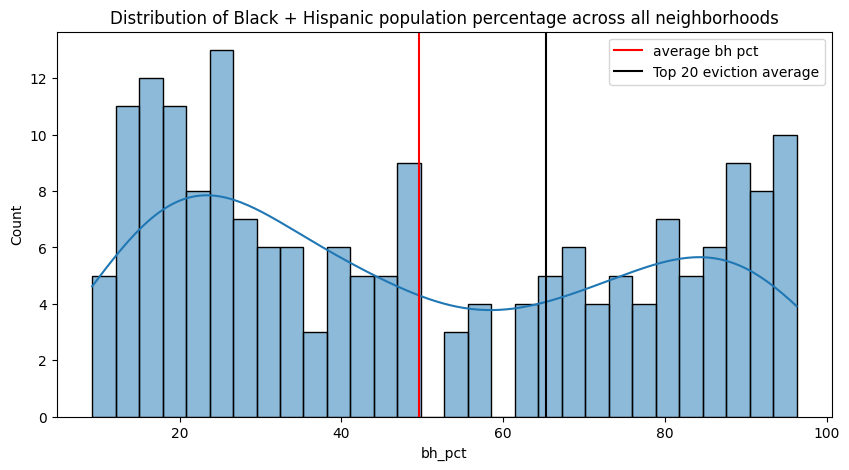

In [308]:
plt.figure(figsize=(10, 5))
sns.histplot(racial_avg_all['bh_pct'], kde=True, bins=30)
plt.axvline(racial_avg_all['bh_pct'].mean(), color='red', label='average bh pct')
plt.axvline(avg_bh_pct_top_20, color='black', label='Top 20 eviction average')
plt.legend()
plt.title("Distribution of Black + Hispanic population percentage across all neighborhoods")
plt.show()

In [319]:
evi_svi_df_cleaned.head()

,nta,average_year_eviction_count,rpl_themes,borough
0,park-cemetery-etc-Bronx,6.466667,0.992500,BRONX
1,Seagate-Coney Island,4.390428,0.991117,BROOKLYN
2,Corona,4.259729,0.963186,QUEENS
3,University Heights-Morris Heights,3.505120,0.997861,BRONX
4,Park Slope-Gowanus,2.372549,0.632673,BROOKLYN


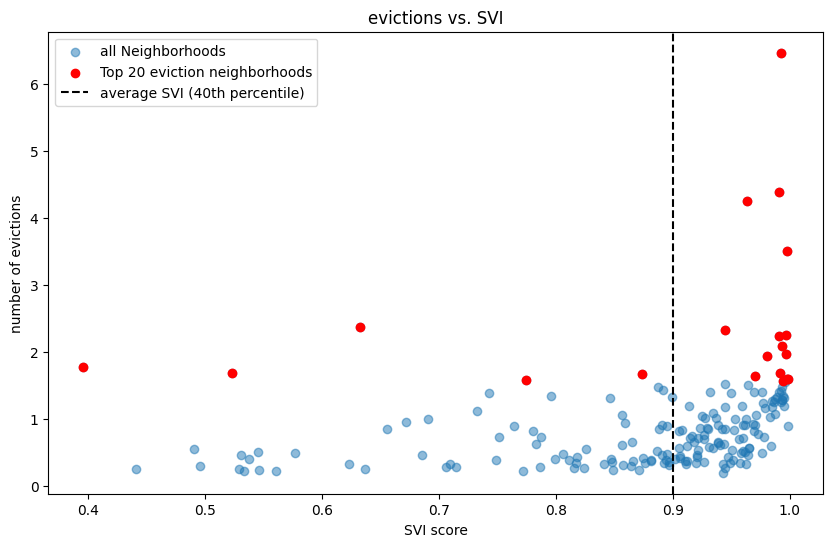

In [325]:
plt.figure(figsize=(10, 6))
plt.scatter(evi_svi_df_cleaned['rpl_themes'], evi_svi_df_cleaned['average_year_eviction_count'], alpha=0.5, label='all Neighborhoods')
plt.scatter(top_20['rpl_themes'], top_20['average_year_eviction_count'], color='red', label='Top 20 eviction neighborhoods')
plt.axvline(avergae_svi_top_20_nta, color='black', linestyle='--', label=f'average SVI (40th percentile)')
plt.xlabel('SVI score')
plt.ylabel('number of evictions')
plt.title('evictions vs. SVI')
plt.legend()
plt.show()

In [336]:
# avg_bh_pct_top_20.head()

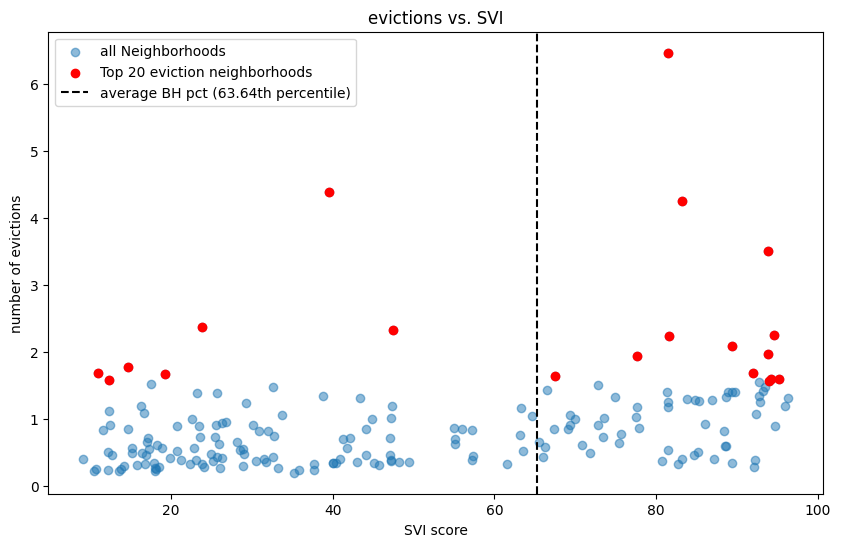

In [335]:
plt.figure(figsize=(10, 6))
plt.scatter(racial_avg_all['bh_pct'], racial_avg_all['average_year_eviction_count'], alpha=0.5, label='all Neighborhoods')
plt.scatter(top_20_race_evictions['bh_pct'], top_20_race_evictions['average_year_eviction_count'], color='red', label='Top 20 eviction neighborhoods')
plt.axvline(avg_bh_pct_top_20, color='black', linestyle='--', label=f'average BH pct (63.64th percentile)')
plt.xlabel('SVI score')
plt.ylabel('number of evictions')
plt.title('evictions vs. SVI')
plt.legend()
plt.show()